#  CIA World Factbook

The CIA World Factbook is a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information such as:

* `population` - The population as of 2015.
* `population_growth` - The annual population growth rate, as a percentage.
* `area` - The total land and water area.

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

Here are the descriptions for some of the columns:
* `name` - The name of the country.
* `area` - The total land and sea area of the country.
* `population` - The country's population.
* `population_growth`- The country's population growth as a percentage.
* `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
* `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
* `area` - The country's total area (both land and water).
* `area_land` - The country's land area in square kilometers.
* `area_water` - The country's waterarea in square kilometers.

## Summary Statistics

In [3]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q, conn)

MIN(population)  MAX(population)  MIN(population_growth)  \
0                0       7256490011                     0.0   

   MAX(population_growth)  
0                    4.02

## Outliers

In [8]:
q = "SELECT * FROM facts WHERE population = (SELECT MIN(population) FROM facts);"
pd.read_sql_query(q, conn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None

In [9]:
q = "SELECT * FROM facts WHERE population = (SELECT MAX(population) FROM facts);"
pd.read_sql_query(q, conn)

id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None

The Facts table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0.

## Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa066d400>,
      dtype=object)

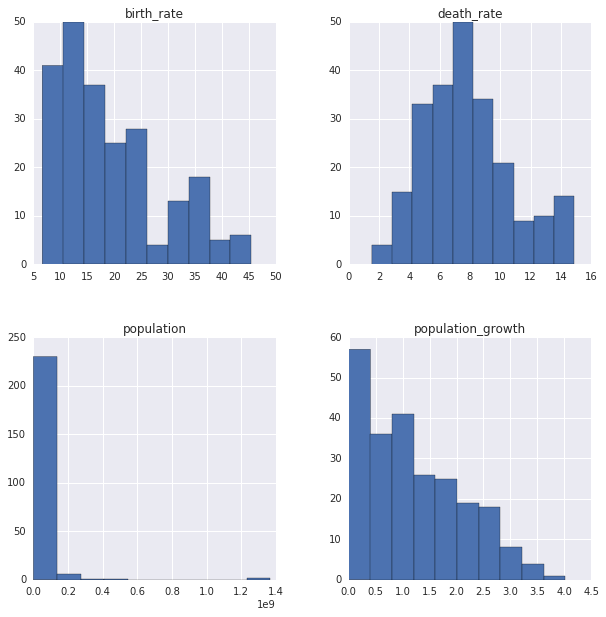

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population <> (SELECT MIN(population) FROM facts) AND population <> (SELECT MAX(population) FROM facts);"
pd.read_sql_query(q, conn).hist(ax=ax)